# **Project task:**

**Have you ever wondered what truly makes a country happy?**
<br>
<br>
**Introduction & Goal:**
<br>
We'll be exploring the 2018-2019 World Happiness Report to uncover the key drivers of happiness, and to demonstrate that "softer" social factors can be just as, or even more, influential than economic prosperity.
<br>
<br>
**Questions:**
<br>
Which factors have the strongest link to happiness?

How do strongest factors contribute to happiness?

What separates the happiest countries?

Does corruption undermine happiness?

Can other factors make up for lower GDP?
<br>
<br>
**Variables:**
<br>
**rank:** country's overall position on a scale from 1 (most happy) to 156 (least happy)

**country:** country

**score:** national life evaluation scores from the Gallup World Poll

**gdp:** a measure of a country's economic output and standard of living

**social_support:** how people appreciate the social support by governments

**freedom_choices:** the extent to which individuals feel they have the liberty to make important decisions about their lives

**generosity:** the tendency of people in a country to be charitable or helpful to others

**corruption:** the level of trust people have in their government and public institutions, and whether they perceive them to be corrupt
<br>
<br>
**Dataset:**
<br>
[https://www.worldhappiness.report/](https://www.worldhappiness.report/)

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.colors as mcolors
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/allWomen_DA_bootcamp/_module2_/datasets/Students_turn/Ex2.2._Happiness-Score.csv')
df_raw.head()

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [ ]:
df = df_raw
df.head()

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  312 non-null    int64  
 1   Unnamed: 0                    312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [ ]:
df['Unnamed: 0.1'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
df['Unnamed: 0'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155])

In [ ]:
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [ ]:
df['Country or region'].unique()

array(['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'United Kingdom', 'Austria', 'Costa Rica', 'Ireland', 'Germany',
       'Belgium', 'Luxembourg', 'United States', 'Israel',
       'United Arab Emirates', 'Czech Republic', 'Malta', 'France',
       'Mexico', 'Chile', 'Taiwan', 'Panama', 'Brazil', 'Argentina',
       'Guatemala', 'Uruguay', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Malaysia', 'Spain', 'Colombia', 'Trinidad & Tobago', 'Slovakia',
       'El Salvador', 'Nicaragua', 'Poland', 'Bahrain', 'Uzbekistan',
       'Kuwait', 'Thailand', 'Italy', 'Ecuador', 'Belize', 'Lithuania',
       'Slovenia', 'Romania', 'Latvia', 'Japan', 'Mauritius', 'Jamaica',
       'South Korea', 'Northern Cyprus', 'Russia', 'Kazakhstan', 'Cyprus',
       'Bolivia', 'Estonia', 'Paraguay', 'Peru', 'Kosovo', 'Moldova',
       'Turkmenistan', 'Hungary', 'Libya', 'Philippines', 'Honduras',
       'Belarus', 'Turkey

In [ ]:
df.rename(columns={'Overall rank':'rank', 'Country or region':'country',
       'Score':'score', 'GDP per capita':'gdp', 'Social support':'social_support', 'Healthy life expectancy':'life_expectancy',
       'Freedom to make life choices':'freedom_choices', 'Generosity':'generosity',
       'Perceptions of corruption':'corruption', 'year':'year'}, inplace=True)

In [ ]:
df.head()

,rank,country,score,gdp,social_support,life_expectancy,freedom_choices,generosity,corruption,year
0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [ ]:
df.life_expectancy.isna().sum()

np.int64(305)

In [ ]:
print(f'% of NaN in {list(df)[5]} = {(df.life_expectancy.isna().sum() / len(df.life_expectancy)).round(decimals=2)}')

% of NaN in life_expectancy = 0.98


In [ ]:
df.drop('life_expectancy', axis=1, inplace=True)

In [ ]:
df.head()

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018


In [ ]:
df.corruption.isna().value_counts()

,count
corruption,
False,311
True,1


In [ ]:
df[df['corruption'].isna()][['country','year','corruption']]

,country,year,corruption
19,United Arab Emirates,2018,NaN


In [ ]:
df[df['country'].isin(['United Arab Emirates'])][['country','year','corruption']]

,country,year,corruption
19,United Arab Emirates,2018,NaN
176,United Arab Emirates,2019,0.182


In [ ]:
df.loc[(df['country'] == 'United Arab Emirates') & (df['year'] == 2018), 'corruption'] = df.loc[(df['country'] == 'United Arab Emirates') & (df['year'] == 2019),'corruption'].values[0]

In [ ]:
df.loc[(df['country'] == 'United Arab Emirates') & (df['year'] == 2018), 'corruption']

,corruption
19,0.182


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             312 non-null    int64  
 1   country          312 non-null    object 
 2   score            312 non-null    float64
 3   gdp              312 non-null    float64
 4   social_support   312 non-null    float64
 5   freedom_choices  312 non-null    float64
 6   generosity       312 non-null    float64
 7   corruption       312 non-null    float64
 8   year             312 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 22.1+ KB


In [ ]:
df.describe()

,rank,score,gdp,social_support,freedom_choices,generosity,corruption,year
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,78.500000,5.391506,0.898298,1.211026,0.423538,0.182926,0.111526,2018.500000
std,45.104737,1.114631,0.394592,0.300310,0.156024,0.096739,0.095296,0.500803
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,39.750000,4.514250,0.609500,1.055750,0.322500,0.108750,0.050000,2018.000000
50%,78.500000,5.379500,0.960000,1.265500,0.449500,0.175500,0.082000,2018.500000
75%,117.250000,6.176000,1.219500,1.457500,0.540250,0.245000,0.141250,2019.000000
max,156.000000,7.769000,2.096000,1.644000,0.724000,0.598000,0.457000,2019.000000


In [ ]:
df.duplicated().value_counts()

,count
False,312


In [ ]:
df.year.unique()

array([2018, 2019])

In [ ]:
df2018 = df[df['year'] == 2018]
df2018.head()

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018


In [ ]:
df2019 = df[df['year'] == 2019].reset_index(drop=True)
df2019.head()

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year
0,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.557,0.322,0.298,2019


# **1. Which factors correlate most strongly with happiness?**

# **1a. Heatmaps**

In [ ]:
num_df2018_clean = df2018.select_dtypes(include='number').drop(columns=['year','rank'])

In [ ]:
num_df2018_clean.head()

,score,gdp,social_support,freedom_choices,generosity,corruption
0,7.632,1.305,1.592,0.681,0.202,0.393
1,7.594,1.456,1.582,0.686,0.286,0.340
2,7.555,1.351,1.590,0.683,0.284,0.408
3,7.495,1.343,1.644,0.677,0.353,0.138
4,7.487,1.420,1.549,0.660,0.256,0.357


In [ ]:
num_df2019_clean = df2019.select_dtypes(include='number').drop(columns=['year','rank'])

In [ ]:
num_df2019_clean.head()

,score,gdp,social_support,freedom_choices,generosity,corruption
0,7.769,1.340,1.587,0.596,0.153,0.393
1,7.600,1.383,1.573,0.592,0.252,0.410
2,7.554,1.488,1.582,0.603,0.271,0.341
3,7.494,1.380,1.624,0.591,0.354,0.118
4,7.488,1.396,1.522,0.557,0.322,0.298


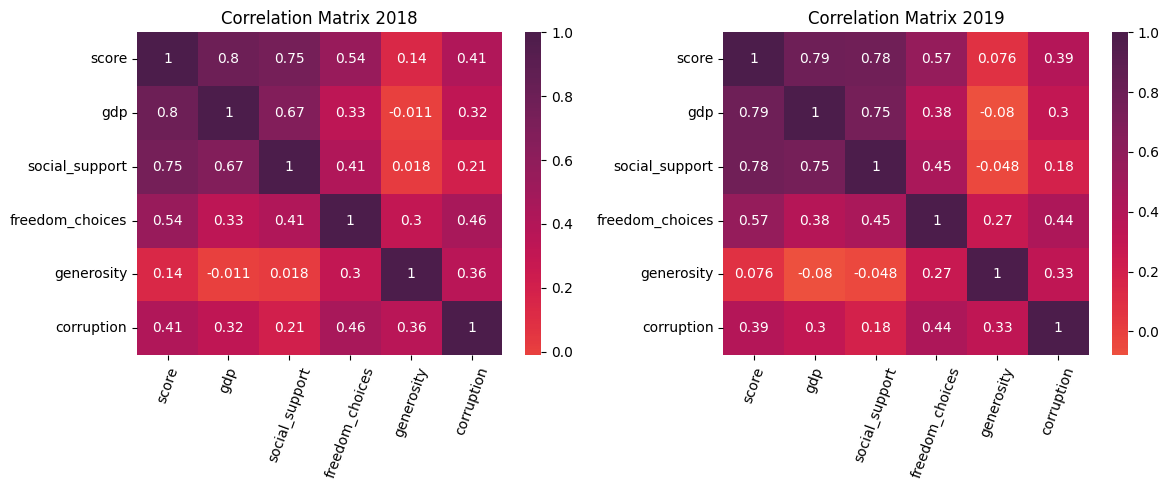

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(num_df2018_clean.corr(), annot=True, cmap=light_rocket, center=0, ax=axes[0])
axes[0].set_title("Correlation Matrix 2018")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=70)

sns.heatmap(num_df2019_clean.corr(), annot=True, cmap=light_rocket, center=0, ax=axes[1])
axes[1].set_title("Correlation Matrix 2019")
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=70)

plt.tight_layout()
plt.show()

In [ ]:
corr_score_df2018 = num_df2018_clean.corr()['score'].drop('score').to_frame().T
corr_score_df2018

,gdp,social_support,freedom_choices,generosity,corruption
score,0.802124,0.74576,0.54428,0.135825,0.408405


In [ ]:
corr_score_df2019 = num_df2019_clean.corr()['score'].drop('score').to_frame().T
corr_score_df2019

,gdp,social_support,freedom_choices,generosity,corruption
score,0.793883,0.777058,0.566742,0.075824,0.385613


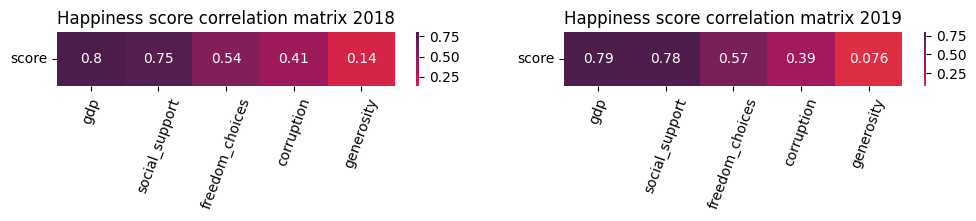

In [ ]:
base_cmap = cm.get_cmap("rocket_r", 256)

light_rocket = mcolors.ListedColormap(base_cmap(np.linspace(0.0, 0.8, 256)))

# Sort the correlations by strength (descending)
order2018 = corr_score_df2018.loc['score'].abs().sort_values(ascending=False)
order2019 = corr_score_df2019.loc['score'].abs().sort_values(ascending=False)

# Convert to DataFrame for heatmap (so it's 2D)
corr_score_df2018_sorted = order2018.to_frame().T
corr_score_df2019_sorted = order2019.to_frame().T

fig, axes = plt.subplots(1, 2, figsize=(12,0.7))


sns.heatmap(corr_score_df2018_sorted, annot=True, cmap=light_rocket, center=0, ax=axes[0])
axes[0].set_title("Happiness score correlation matrix 2018")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=70)
axes[0].set_yticklabels(axes[0].get_yticklabels(),rotation=0)


sns.heatmap(corr_score_df2019_sorted, annot=True, cmap=light_rocket, center=0, ax=axes[1])
axes[1].set_title("Happiness score correlation matrix 2019")
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=70)
axes[1].set_yticklabels(axes[1].get_yticklabels(),rotation=0)

plt.show()

# **2. Is GDP enough to explain happiness, or do social factors matter more?**

# **2a. Scatterplots**

In [ ]:
df2018['group'] = 'Middle'

In [ ]:
df2018.loc[df2018.index[:20], 'group'] = 'Top 20'

In [ ]:
df2018.loc[df2018.index[-20:], 'group'] = 'Bottom 20'

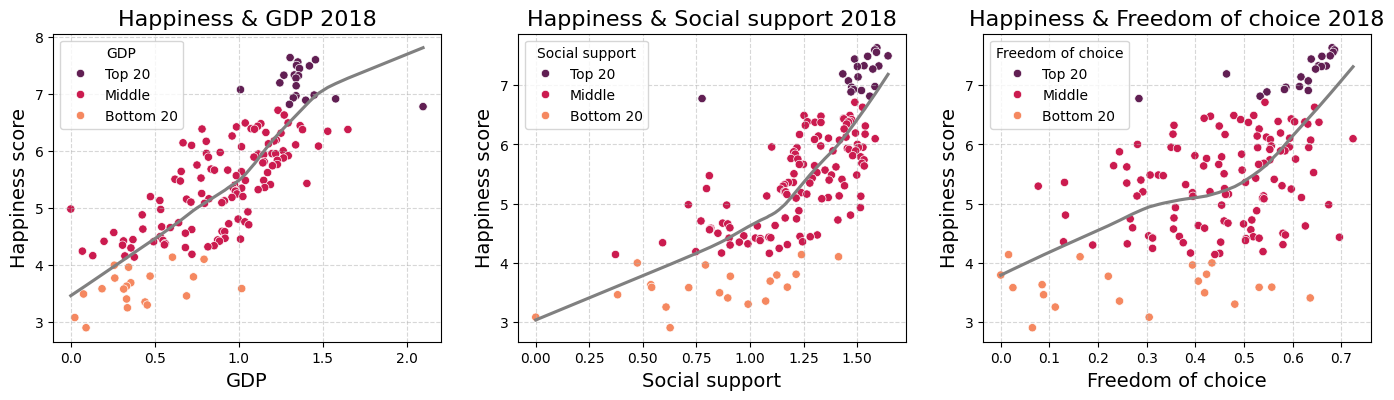

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(17,4))
sns.scatterplot(data=df2018, x='gdp', y='score', hue='group', palette='rocket', ax=axes[0])
sns.regplot(data=df2018, x='gdp', y='score', ax=axes[0], scatter=False, lowess=True, color='grey')

axes[0].set_title('Happiness & GDP 2018', fontsize=16)
axes[0].set_xlabel('GDP', fontsize=14)
axes[0].set_ylabel('Happiness score', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend(title='GDP', fontsize=10, title_fontsize=10)

sns.scatterplot(data=df2018, x='social_support', y='score', hue='group', palette='rocket', ax=axes[1])
sns.regplot(data=df2018, x='social_support', y='score', ax=axes[1], scatter=False, lowess=True, color='grey')

axes[1].set_title('Happiness & Social support 2018', fontsize=16)
axes[1].set_xlabel('Social support', fontsize=14)
axes[1].set_ylabel('Happiness score', fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend(title='Social support', fontsize=10, title_fontsize=10)

sns.scatterplot(data=df2018, x='freedom_choices', y='score', hue='group', palette='rocket', ax=axes[2])
sns.regplot(data=df2018, x='freedom_choices', y='score', ax=axes[2], scatter=False, lowess=True, color='grey')

axes[2].set_title('Happiness & Freedom of choice 2018', fontsize=16)
axes[2].set_xlabel('Freedom of choice', fontsize=14)
axes[2].set_ylabel('Happiness score', fontsize=14)
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].legend(title='Freedom of choice', fontsize=10, title_fontsize=10)

In [ ]:
df2019['group'] = 'Middle'

In [ ]:
df2019.loc[df2019.index[:20], 'group'] = 'Top 20'

In [ ]:
df2019.loc[df2019.index[-20:], 'group'] = 'Bottom 20'

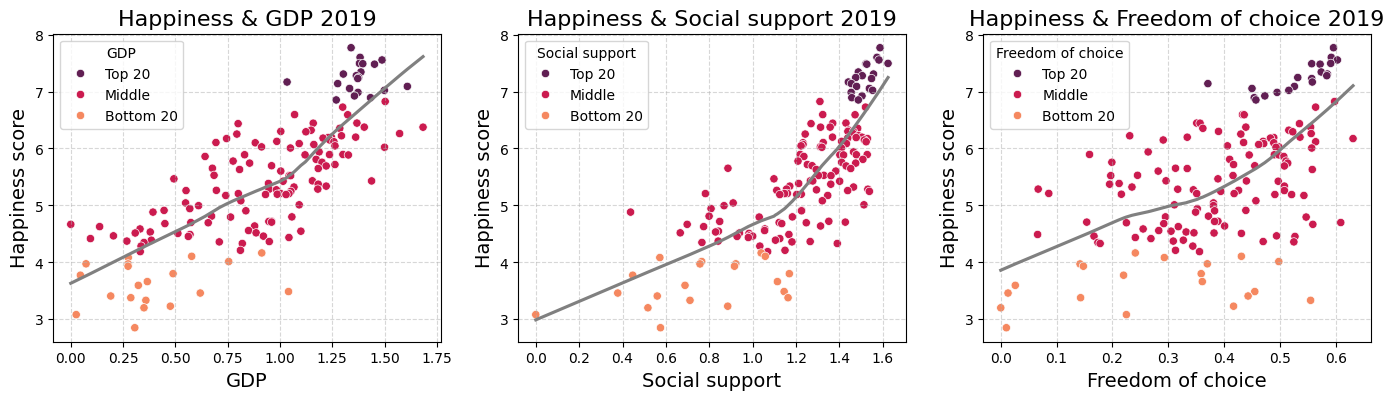

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(17,4))
sns.scatterplot(data=df2019, x='gdp', y='score', hue='group', palette='rocket', ax=axes[0])
sns.regplot(data=df2019, x='gdp', y='score', ax=axes[0], scatter=False, lowess=True, color='grey')

axes[0].set_title('Happiness & GDP 2019', fontsize=16)
axes[0].set_xlabel('GDP', fontsize=14)
axes[0].set_ylabel('Happiness score', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend(title='GDP', fontsize=10, title_fontsize=10)

sns.scatterplot(data=df2019, x='social_support', y='score', hue='group', palette='rocket', ax=axes[1])
sns.regplot(data=df2019, x='social_support', y='score', ax=axes[1], scatter=False, lowess=True, color='grey')

axes[1].set_title('Happiness & Social support 2019', fontsize=16)
axes[1].set_xlabel('Social support', fontsize=14)
axes[1].set_ylabel('Happiness score', fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend(title='Social support', fontsize=10, title_fontsize=10)

sns.scatterplot(data=df2019, x='freedom_choices', y='score', hue='group', palette='rocket', ax=axes[2])
sns.regplot(data=df2019, x='freedom_choices', y='score', ax=axes[2], scatter=False, lowess=True, color='grey')

axes[2].set_title('Happiness & Freedom of choice 2019', fontsize=16)
axes[2].set_xlabel('Freedom of choice', fontsize=14)
axes[2].set_ylabel('Happiness score', fontsize=14)
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].legend(title='Freedom of choice', fontsize=10, title_fontsize=10)

# **2b. Bar plots**

In [ ]:
corr_for_bar_df2018 = corr_score_df2018.T.reset_index()

In [ ]:
corr_for_bar_df2018.rename(columns={'index':'factors'}, inplace=True)

In [ ]:
corr_for_bar_df2018

,factors,score
0,gdp,0.802124
1,social_support,0.745760
2,freedom_choices,0.544280
3,generosity,0.135825
4,corruption,0.408405


In [ ]:
corr_for_bar_df2019 = corr_score_df2019.T.reset_index()

In [ ]:
corr_for_bar_df2019.rename(columns={'index':'factors'}, inplace=True)

In [ ]:
corr_for_bar_df2019

,factors,score
0,gdp,0.793883
1,social_support,0.777058
2,freedom_choices,0.566742
3,generosity,0.075824
4,corruption,0.385613


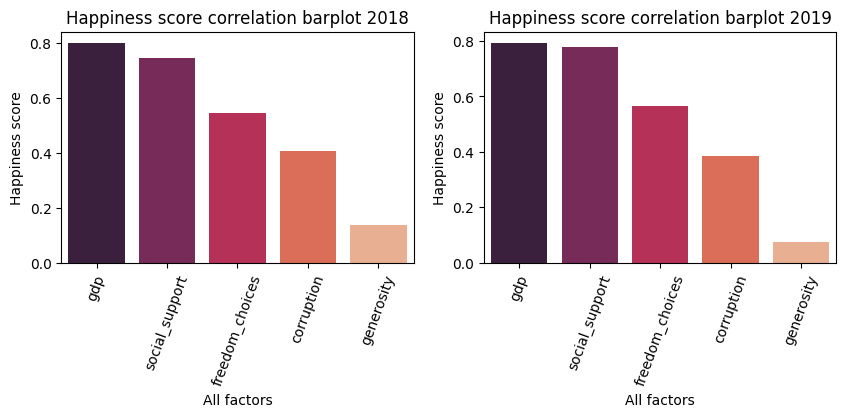

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,3))


sns.barplot(corr_for_bar_df2018, x='factors', y='score', palette='rocket', order=corr_for_bar_df2018.sort_values('score', ascending=False)['factors'], ax=axes[0])
axes[0].set_title("Happiness score correlation barplot 2018")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=70)
axes[0].set_xlabel('All factors')
axes[0].set_ylabel('Happiness score')


sns.barplot(corr_for_bar_df2019, x='factors', y='score', palette='rocket', order=corr_for_bar_df2019.sort_values('score', ascending=False)['factors'], ax=axes[1])
axes[1].set_title("Happiness score correlation barplot 2019")
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=70)
axes[1].set_xlabel('All factors')
axes[1].set_ylabel('Happiness score')

plt.show()

In [ ]:
pal = sns.color_palette('rocket')
pal.as_hex()[:]

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']

In [ ]:
pal.as_hex()[5]

'#f6b48f'

# **3. Are the happiest countries wealthy and socially supported, or is one factor dominant?**

# **3a. Bar plots**

In [ ]:
top20_for_bar_df2018 = df2018.head(20)

In [ ]:
top20_for_bar_df2019 = df2019.head(20)

In [ ]:
top20_for_bar_df2018.head()

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year,group
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018,Top 20
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018,Top 20
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018,Top 20
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018,Top 20
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018,Top 20


In [ ]:
bottom20_for_bar_df2018 = df2018.tail(20)

In [ ]:
bottom20_for_bar_df2019 = df2019.tail(20)

In [ ]:
all_factors = ['gdp','social_support','freedom_choices','generosity','corruption']

In [ ]:
top20_for_bar_df2018_avg = top20_for_bar_df2018[all_factors].mean()

In [ ]:
top20_for_bar_df2019_avg = top20_for_bar_df2019[all_factors].mean()

In [ ]:
top20_for_bar_df2018_avg

,0
gdp,1.38035
social_support,1.49570
freedom_choices,0.60725
generosity,0.27440
corruption,0.27185


In [ ]:
bottom20_for_bar_df2018_avg = bottom20_for_bar_df2018[all_factors].mean()

In [ ]:
bottom20_for_bar_df2019_avg = bottom20_for_bar_df2019[all_factors].mean()

In [ ]:
bottom20_for_bar_df2018_avg

,0
gdp,0.40590
social_support,0.83310
freedom_choices,0.28025
generosity,0.18535
corruption,0.09600


In [ ]:
top20_bottom20_for_bar_df2018 = pd.DataFrame({'top_20' : top20_for_bar_df2018_avg, 'bottom_20' : bottom20_for_bar_df2018_avg})

In [ ]:
top20_bottom20_for_bar_df2018

,top_20,bottom_20
gdp,1.38035,0.40590
social_support,1.49570,0.83310
freedom_choices,0.60725,0.28025
generosity,0.27440,0.18535
corruption,0.27185,0.09600


In [ ]:
top20_bottom20_for_bar_df2019 = pd.DataFrame({'top_20' : top20_for_bar_df2019_avg, 'bottom_20' : bottom20_for_bar_df2019_avg})

In [ ]:
top20_bottom20_for_bar_df2019

,top_20,bottom_20
gdp,1.37120,0.40105
social_support,1.51770,0.76905
freedom_choices,0.53215,0.26750
generosity,0.25325,0.20000
corruption,0.25990,0.10320


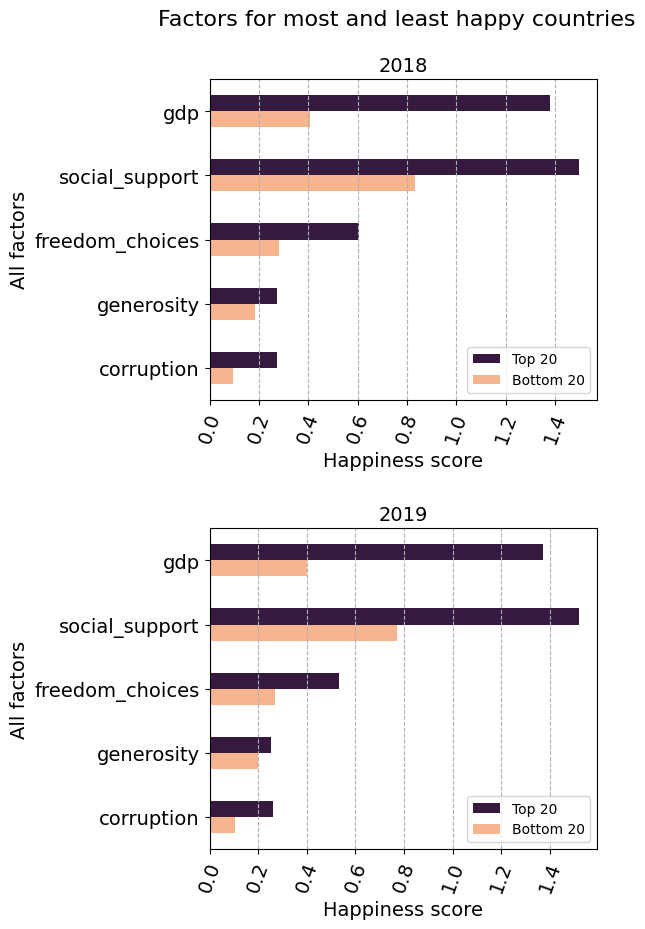

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(5,10))
fig.suptitle('Factors for most and least happy countries', fontsize=16, y=0.95)
plt.subplots_adjust(hspace=0.4)

top20_bottom20_for_bar_df2018.plot(kind='barh', color=['#35193e','#f6b48f'], ax=axes[0])
axes[0].invert_yaxis()
axes[0].set_title("2018", fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=70, fontsize=14)
axes[0].set_yticklabels(axes[0].get_yticklabels(),rotation=0, fontsize=14)
axes[0].set_xlabel('Happiness score', fontsize=14)
axes[0].set_ylabel('All factors', fontsize=14)
axes[0].legend(['Top 20','Bottom 20'])
axes[0].grid(axis='x', linestyle='--')


top20_bottom20_for_bar_df2019.plot(kind='barh', color=['#35193e','#f6b48f'], ax=axes[1])
axes[1].invert_yaxis()
axes[1].set_title("2019", fontsize=14)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=70, fontsize=14)
axes[1].set_yticklabels(axes[0].get_yticklabels(),rotation=0, fontsize=14)
axes[1].set_xlabel('Happiness score', fontsize=14)
axes[1].set_ylabel('All factors', fontsize=14)
axes[1].legend(['Top 20','Bottom 20'])
axes[1].grid(axis='x', linestyle='--')

plt.show()

# **4. Global Happiness Map: where are happy vs. unhappy regions?**

# **4a. Choropleth**

In [ ]:
df2018.head()

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year,group
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018,Top 20
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018,Top 20
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018,Top 20
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018,Top 20
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018,Top 20


In [ ]:
fig = px.choropleth(
    df2018,
    locations='country',
    locationmode='country names',
    color='score',
    hover_name='country',
    hover_data=['rank','score'],
    color_continuous_scale='BrBG',
    projection="natural earth"

)

fig.update_layout(
    title="Global happiness map 2018",
    geo=dict(showframe=False, showcoastlines=True)
)

fig.show()

In [ ]:
fig = px.choropleth(
    df2019,
    locations='country',
    locationmode='country names',
    color='score',
    hover_name='country',
    hover_data=['rank','score'],
    color_continuous_scale='BrBG',
    projection="natural earth"

)

fig.update_layout(
    title="Global happiness map 2019",
    geo=dict(showframe=False, showcoastlines=True)
)

fig.show()

# **5. Does corruption undermine happiness, even in wealthy countries?**

# **5a. Boxplot of corruption perception by happiness quartiles.**

In [ ]:
corrupt_boxplot_df2018 = df2018.copy()

In [ ]:
corrupt_boxplot_df2018.head()

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year,group,happy_quarter
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018,Top 20,Q1 (happiest)
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018,Top 20,Q1 (happiest)
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018,Top 20,Q1 (happiest)
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018,Top 20,Q1 (happiest)
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018,Top 20,Q1 (happiest)


In [ ]:
corrupt_boxplot_df2018['happy_quarter'] = pd.qcut(corrupt_boxplot_df2018['score'], q=4, labels=['Q4 (least happy)','Q3','Q2','Q1 (happiest)'])

In [ ]:
corrupt_boxplot_df2019 = df2019.copy()

In [ ]:
corrupt_boxplot_df2019['happy_quarter'] = pd.qcut(corrupt_boxplot_df2019['score'], q=4, labels=['Q4 (least happy)','Q3','Q2','Q1 (happiest)'])

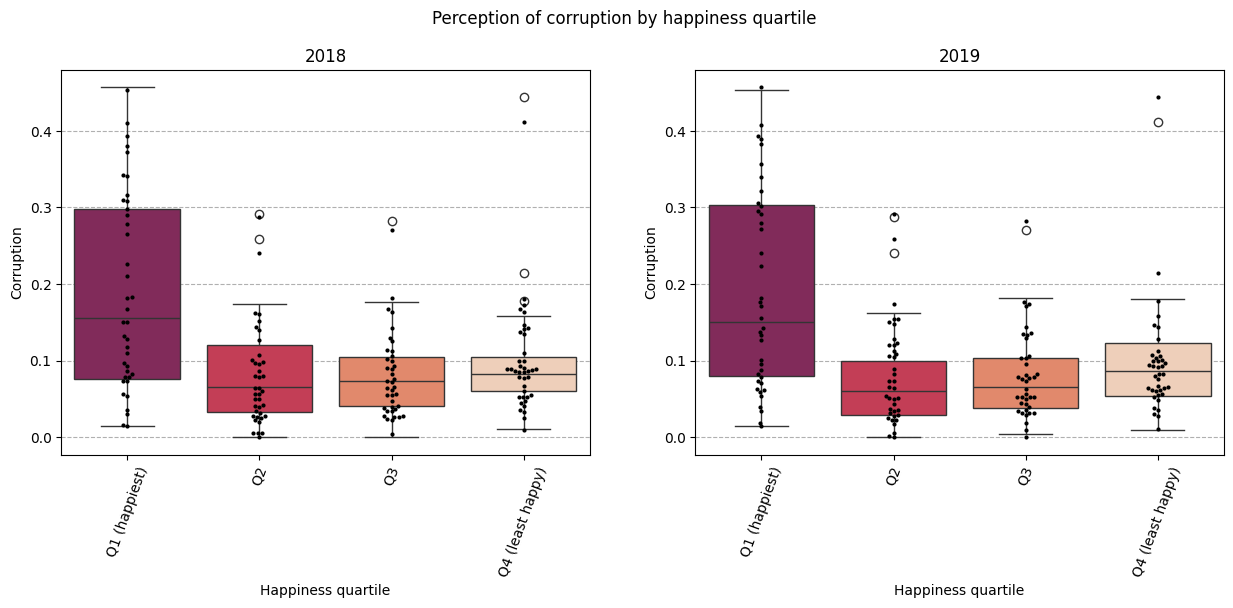

In [ ]:
quartile_light_rocket = [light_rocket(i) for i in np.linspace(0.1, 0.8, 4)[::-1]]

fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Perception of corruption by happiness quartile', y=1)

sns.boxplot(corrupt_boxplot_df2018, x='happy_quarter', y='corruption', palette=quartile_light_rocket, order=['Q1 (happiest)','Q2','Q3', 'Q4 (least happy)'], ax=axes[0])
axes[0].set_title("2018")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=70)
axes[0].set_xlabel('Happiness quartile')
axes[0].set_ylabel('Corruption')
axes[0].grid(axis='y', linestyle='--')

sns.swarmplot(corrupt_boxplot_df2019, x='happy_quarter', y='corruption', color='black', size=3, ax=axes[0])


sns.boxplot(corrupt_boxplot_df2019, x='happy_quarter', y='corruption', palette=quartile_light_rocket, order=['Q1 (happiest)','Q2','Q3', 'Q4 (least happy)'], ax=axes[1])
axes[1].set_title("2019")
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=70)
axes[1].set_xlabel('Happiness quartile')
axes[1].set_ylabel('Corruption')
axes[1].grid(axis='y', linestyle='--')

sns.swarmplot(corrupt_boxplot_df2018, x='happy_quarter', y='corruption', color='black', size=3, ax=axes[1])

plt.show()

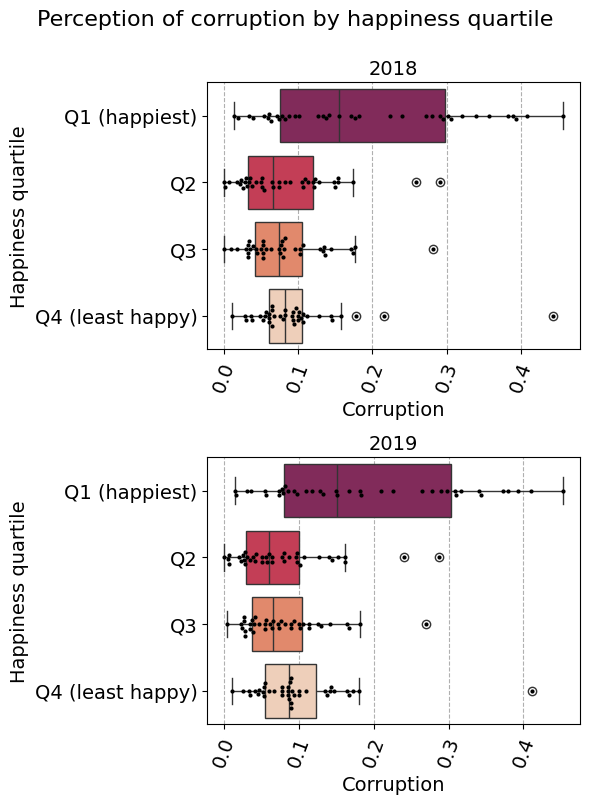

In [ ]:
quartile_light_rocket = [light_rocket(i) for i in np.linspace(0.1, 0.8, 4)[::-1]]

fig, axes = plt.subplots(2, 1, figsize=(6, 8))
fig.suptitle('Perception of corruption by happiness quartile', fontsize=16, y=1)


sns.boxplot(
    data=corrupt_boxplot_df2018,
    x='corruption', y='happy_quarter',
    palette=quartile_light_rocket,
    order=['Q1 (happiest)', 'Q2', 'Q3', 'Q4 (least happy)'],
    ax=axes[0]
)
axes[0].set_title("2018", fontsize=14)
axes[0].set_ylabel('Happiness quartile', fontsize=14)
axes[0].set_xlabel('Corruption', fontsize=14)
axes[0].grid(axis='x', linestyle='--')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=70, fontsize=14)
axes[0].set_yticklabels(axes[0].get_yticklabels(),rotation=0, fontsize=14)

sns.swarmplot(
    data=corrupt_boxplot_df2018,
    x='corruption', y='happy_quarter',
    color='black', size=3, ax=axes[0]
)


sns.boxplot(
    data=corrupt_boxplot_df2019,
    x='corruption', y='happy_quarter',
    palette=quartile_light_rocket,
    order=['Q1 (happiest)', 'Q2', 'Q3', 'Q4 (least happy)'],
    ax=axes[1]
)
axes[1].set_title("2019", fontsize=14)
axes[1].set_ylabel('Happiness quartile', fontsize=14)
axes[1].set_xlabel('Corruption', fontsize=14)
axes[1].grid(axis='x', linestyle='--')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=70, fontsize=14)
axes[1].set_yticklabels(axes[1].get_yticklabels(),rotation=0, fontsize=14)

sns.swarmplot(
    data=corrupt_boxplot_df2019,
    x='corruption', y='happy_quarter',
    color='black', size=3, ax=axes[1]
)

plt.tight_layout()
plt.show()

# **6. Outliers**

In [ ]:
df2018.head(20)

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year,group
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018,Top 20
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018,Top 20
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018,Top 20
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018,Top 20
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018,Top 20
5,6,Netherlands,7.441,1.361,1.488,0.638,0.333,0.295,2018,Top 20
6,7,Canada,7.328,1.330,1.532,0.653,0.321,0.291,2018,Top 20
7,8,New Zealand,7.324,1.268,1.601,0.669,0.365,0.389,2018,Top 20
8,9,Sweden,7.314,1.355,1.501,0.659,0.285,0.383,2018,Top 20
9,10,Australia,7.272,1.340,1.573,0.647,0.361,0.302,2018,Top 20


In [ ]:
df2018.sort_values('gdp', ascending=False).head(20)

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year,group
19,20,United Arab Emirates,6.774,2.096,0.776,0.284,0.186,0.182,2018,Top 20
31,32,Qatar,6.374,1.649,1.303,0.654,0.256,0.171,2018,Middle
16,17,Luxembourg,6.910,1.576,1.520,0.632,0.196,0.321,2018,Top 20
33,34,Singapore,6.343,1.529,1.451,0.631,0.261,0.457,2018,Middle
44,45,Kuwait,6.083,1.474,1.301,0.554,0.167,0.106,2018,Middle
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018,Top 20
13,14,Ireland,6.977,1.448,1.583,0.614,0.307,0.306,2018,Top 20
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018,Top 20
75,76,Hong Kong,5.430,1.405,1.290,0.524,0.246,0.291,2018,Middle
17,18,United States,6.886,1.398,1.471,0.547,0.291,0.133,2018,Top 20


In [ ]:
# above lowest score from Top 20 and below lowest gdp from Top 20 gdps
df2018_high_score_low_gdp = df2018[(df2018['score'] >= 6.774) & (df2018['gdp'] <= 1.338)]
df2018_high_score_low_gdp

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year,group
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018,Top 20
6,7,Canada,7.328,1.330,1.532,0.653,0.321,0.291,2018,Top 20
7,8,New Zealand,7.324,1.268,1.601,0.669,0.365,0.389,2018,Top 20
10,11,United Kingdom,7.190,1.244,1.433,0.464,0.262,0.082,2018,Top 20
12,13,Costa Rica,7.072,1.010,1.459,0.632,0.143,0.101,2018,Top 20
15,16,Belgium,6.927,1.324,1.483,0.583,0.188,0.240,2018,Top 20
18,19,Israel,6.814,1.301,1.559,0.533,0.354,0.272,2018,Top 20


In [ ]:
score_avg_df2018 = df2018['score'].mean()
score_avg_df2018

np.float64(5.375916666666667)

In [ ]:
score_max_df2018 = df2018['score'].max()
score_max_df2018

7.6320000000000014

In [ ]:
gdp_avg_df2018 = df2018['gdp'].mean()
gdp_avg_df2018

np.float64(0.8914487179487179)

In [ ]:
gdp_max_df2018 = df2018['gdp'].max()
gdp_max_df2018

2.096

In [ ]:
social_avg_df2018 = df2018['social_support'].mean()
social_avg_df2018

np.float64(1.2132371794871795)

In [ ]:
social_max_df2018 = df2018['social_support'].max()
social_max_df2018

1.644

In [ ]:
freedom_avg_df2018 = df2018['freedom_choices'].mean()
freedom_avg_df2018

np.float64(0.4545064102564102)

In [ ]:
freedom_max_df2018 = df2018['freedom_choices'].max()
freedom_max_df2018

0.7240000000000001

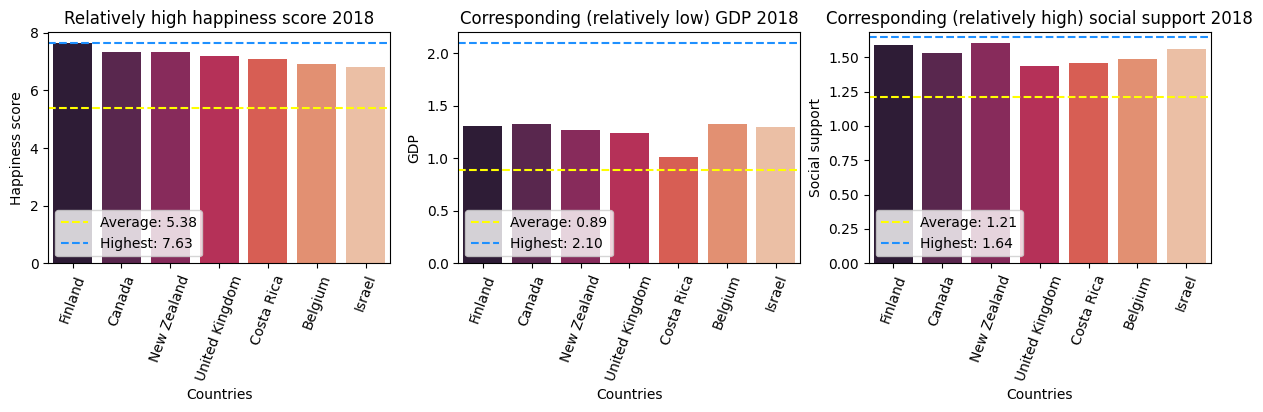

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,3))


sns.barplot(df2018_high_score_low_gdp, x='country', y='score', palette='rocket', order=df2018_high_score_low_gdp.sort_values('score', ascending=False)['country'], ax=axes[0])
axes[0].set_title("Relatively high happiness score 2018")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=70)
axes[0].set_xlabel('Countries')
axes[0].set_ylabel('Happiness score')
axes[0].axhline(score_avg_df2018, color='yellow', linestyle='--', label=f'Average: {score_avg_df2018:.2f}')
axes[0].axhline(score_max_df2018, color='dodgerblue', linestyle='--', label=f'Highest: {score_max_df2018:.2f}')
axes[0].legend(loc='lower left')

sns.barplot(df2018_high_score_low_gdp, x='country', y='gdp', palette='rocket', order=df2018_high_score_low_gdp.sort_values('score', ascending=False)['country'], ax=axes[1])
axes[1].set_title("Corresponding (relatively low) GDP 2018")
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=70)
axes[1].set_xlabel('Countries')
axes[1].set_ylabel('GDP')
axes[1].axhline(gdp_avg_df2018, color='yellow', linestyle='--', label=f'Average: {gdp_avg_df2018:.2f}')
axes[1].axhline(gdp_max_df2018, color='dodgerblue', linestyle='--', label=f'Highest: {gdp_max_df2018:.2f}')
axes[1].legend(loc='lower left')

sns.barplot(df2018_high_score_low_gdp, x='country', y='social_support', palette='rocket', order=df2018_high_score_low_gdp.sort_values('score', ascending=False)['country'], ax=axes[2])
axes[2].set_title("Corresponding (relatively high) social support 2018")
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=70)
axes[2].set_xlabel('Countries')
axes[2].set_ylabel('Social support')
axes[2].axhline(social_avg_df2018, color='yellow', linestyle='--', label=f'Average: {social_avg_df2018:.2f}')
axes[2].axhline(social_max_df2018, color='dodgerblue', linestyle='--', label=f'Highest: {social_max_df2018:.2f}')
axes[2].legend(loc='lower left')

plt.show()

In [ ]:
df2019.head(20)

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year,group
0,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019,Top 20
1,2,Denmark,7.600,1.383,1.573,0.592,0.252,0.410,2019,Top 20
2,3,Norway,7.554,1.488,1.582,0.603,0.271,0.341,2019,Top 20
3,4,Iceland,7.494,1.380,1.624,0.591,0.354,0.118,2019,Top 20
4,5,Netherlands,7.488,1.396,1.522,0.557,0.322,0.298,2019,Top 20
5,6,Switzerland,7.480,1.452,1.526,0.572,0.263,0.343,2019,Top 20
6,7,Sweden,7.343,1.387,1.487,0.574,0.267,0.373,2019,Top 20
7,8,New Zealand,7.307,1.303,1.557,0.585,0.330,0.380,2019,Top 20
8,9,Canada,7.278,1.365,1.505,0.584,0.285,0.308,2019,Top 20
9,10,Austria,7.246,1.376,1.475,0.532,0.244,0.226,2019,Top 20


In [ ]:
df2019.sort_values('gdp', ascending=False).head(20)

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year,group
28,29,Qatar,6.374,1.684,1.313,0.555,0.220,0.167,2019,Middle
13,14,Luxembourg,7.090,1.609,1.479,0.526,0.194,0.316,2019,Top 20
33,34,Singapore,6.262,1.572,1.463,0.556,0.271,0.453,2019,Middle
20,21,United Arab Emirates,6.825,1.503,1.310,0.598,0.262,0.182,2019,Middle
50,51,Kuwait,6.021,1.500,1.319,0.493,0.142,0.097,2019,Middle
15,16,Ireland,7.021,1.499,1.553,0.516,0.298,0.310,2019,Top 20
2,3,Norway,7.554,1.488,1.582,0.603,0.271,0.341,2019,Top 20
5,6,Switzerland,7.480,1.452,1.526,0.572,0.263,0.343,2019,Top 20
75,76,Hong Kong,5.430,1.438,1.277,0.440,0.258,0.287,2019,Middle
18,19,United States,6.892,1.433,1.457,0.454,0.280,0.128,2019,Top 20


In [ ]:
# above lowest score from Top 20 and below lowest gdp from Top 20 gdps
df2019_high_score_low_gdp = df2019[(df2019['score'] >= 6.852) & (df2019['gdp'] <= 1.365)]
df2019_high_score_low_gdp

,rank,country,score,gdp,social_support,freedom_choices,generosity,corruption,year,group
0,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019,Top 20
7,8,New Zealand,7.307,1.303,1.557,0.585,0.330,0.380,2019,Top 20
8,9,Canada,7.278,1.365,1.505,0.584,0.285,0.308,2019,Top 20
11,12,Costa Rica,7.167,1.034,1.441,0.558,0.144,0.093,2019,Top 20
12,13,Israel,7.139,1.276,1.455,0.371,0.261,0.082,2019,Top 20
14,15,United Kingdom,7.054,1.333,1.538,0.450,0.348,0.278,2019,Top 20
17,18,Belgium,6.923,1.356,1.504,0.473,0.160,0.210,2019,Top 20
19,20,Czech Republic,6.852,1.269,1.487,0.457,0.046,0.036,2019,Top 20


In [ ]:
score_avg_df2019 = df2019['score'].mean()
score_avg_df2019

np.float64(5.407096153846155)

In [ ]:
score_max_df2019 = df2019['score'].max()
score_max_df2019

7.769

In [ ]:
gdp_avg_df2019 = df2019['gdp'].mean()
gdp_avg_df2019

np.float64(0.905147435897436)

In [ ]:
gdp_max_df2019 = df2019['gdp'].max()
gdp_max_df2019

1.6840000000000002

In [ ]:
social_avg_df2019 = df2019['social_support'].mean()
social_avg_df2019

np.float64(1.2088141025641026)

In [ ]:
social_max_df2019 = df2019['social_support'].max()
social_max_df2019

1.624

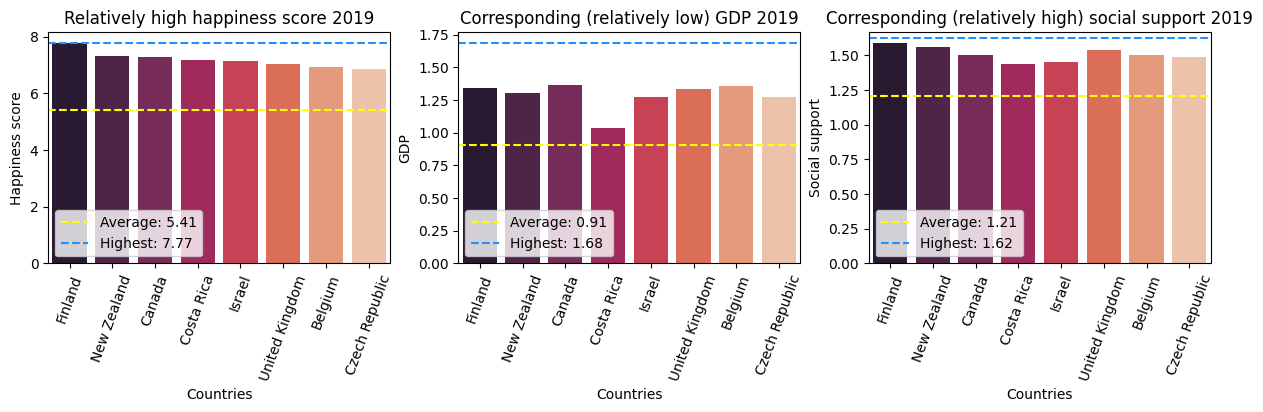

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,3))


sns.barplot(df2019_high_score_low_gdp, x='country', y='score', palette='rocket', order=df2019_high_score_low_gdp.sort_values('score', ascending=False)['country'], ax=axes[0])
axes[0].set_title("Relatively high happiness score 2019")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=70)
axes[0].set_xlabel('Countries')
axes[0].set_ylabel('Happiness score')
axes[0].axhline(score_avg_df2019, color='yellow', linestyle='--', label=f'Average: {score_avg_df2019:.2f}')
axes[0].axhline(score_max_df2019, color='dodgerblue', linestyle='--', label=f'Highest: {score_max_df2019:.2f}')
axes[0].legend(loc='lower left')


sns.barplot(df2019_high_score_low_gdp, x='country', y='gdp', palette='rocket', order=df2019_high_score_low_gdp.sort_values('score', ascending=False)['country'], ax=axes[1])
axes[1].set_title("Corresponding (relatively low) GDP 2019")
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=70)
axes[1].set_xlabel('Countries')
axes[1].set_ylabel('GDP')
axes[1].axhline(gdp_avg_df2019, color='yellow', linestyle='--', label=f'Average: {gdp_avg_df2019:.2f}')
axes[1].axhline(gdp_max_df2019, color='dodgerblue', linestyle='--', label=f'Highest: {gdp_max_df2019:.2f}')
axes[1].legend(loc='lower left')

sns.barplot(df2019_high_score_low_gdp, x='country', y='social_support', palette='rocket', order=df2019_high_score_low_gdp.sort_values('score', ascending=False)['country'], ax=axes[2])
axes[2].set_title("Corresponding (relatively high) social support 2019")
axes[2].set_xticklabels(axes[0].get_xticklabels(),rotation=70)
axes[2].set_xlabel('Countries')
axes[2].set_ylabel('Social support')
axes[2].axhline(social_avg_df2019, color='yellow', linestyle='--', label=f'Average: {social_avg_df2019:.2f}')
axes[2].axhline(social_max_df2019, color='dodgerblue', linestyle='--', label=f'Highest: {social_max_df2019:.2f}')
axes[2].legend(loc='lower left')

plt.show()